In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# f(x) = x^4
def f(x):
    return x**4

# derivative of f(x)
def df(x):
    return 4*x**3


def linear_search(lr=0.1,max_iteration=1000):
    
    fx_list = []
    c1 = 0.5
    c2 = 0.75
    
    x_init = 1
    x = x_init
    fx_list.append(f(x))
    for i in range(max_iteration):

        # descent directon
        p = - df(x)
        
        # update x
        x_new = x + lr * p
        fx_list.append(f(x_new))

        # sufficient decrease condition and curvature condition
        if f(x_new) > f(x) + lr*c1*df(x)*p and df(x_new)*p < c2*df(x)*p:
            break
        else:
            x = x_new
            
    print("x: ", x)
    print("f(x): ",f(x))
    print("df(x): ", df(x))
            
    return fx_list

In [3]:
max_iteration = 100
lr = 0.1
fx_list1 = linear_search(max_iteration=max_iteration,lr=lr)

x:  0.1090387674880599
f(x):  0.0001413590882476063
df(x):  0.005185645124357649


In [4]:
max_iteration = 100
lr = 0.01
fx_list2 = linear_search(max_iteration=max_iteration,lr=lr)

x:  0.33086845976494617
f(x):  0.011984543028368077
df(x):  0.14488589256143755


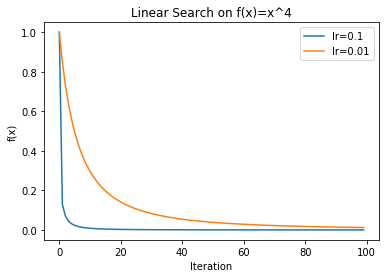

In [5]:
plt.plot(fx_list1[:100])
plt.plot(fx_list2[:100])
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.title('Linear Search on f(x)=x^4')
plt.legend(['lr=0.1','lr=0.01'])
plt.savefig('Q3')
plt.show()

In [6]:
import sympy as sym
x = sym.Symbol('x')
a = sym.Symbol('a')
expr = (x-a*(4*x**3))**4
sym.expand(expr)

256*a**4*x**12 - 256*a**3*x**10 + 96*a**2*x**8 - 16*a*x**6 + x**4

In [7]:
diff = sym.diff(expr,a)
sym.expand(diff)

1024*a**3*x**12 - 768*a**2*x**10 + 192*a*x**8 - 16*x**6

In [8]:
roots = sym.solveset(diff, a)
roots

FiniteSet(1/(4*x**2))

In [9]:
def linear_search_opt(max_iteration=100):
    
    fx_list = []
    c1 = 0.5
    c2 = 0.75
    
    x_init = 1
    x = x_init
    fx_list.append(f(x))
    for i in range(max_iteration):

        try:
            # descent directon
            p = - df(x)
            a = 1 / (4*x**2) # using the second root, first root converges in 2 iteration

            # update x
            x_new = x + a*p
            fx_list.append(f(x_new))

            # sufficient decrease condition and curvature condition
            if f(x_new) > f(x) + lr*c1*df(x)*p and df(x_new)*p < c2*df(x)*p:
                break
            else:
                x = x_new
        except:
            fx_list.append(f(x))
            
    print("x: ", x)
    print("f(x): ",f(x))
    print("df(x): ", df(x))
            
    return fx_list

In [10]:
max_iteration = 100
lr = 0.01
fx_list3 = linear_search_opt(max_iteration=max_iteration)

x:  0.0
f(x):  0.0
df(x):  0.0


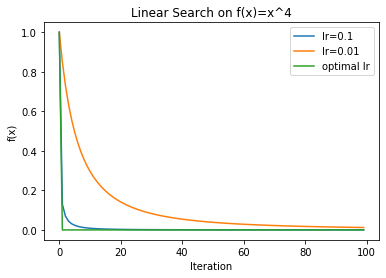

In [11]:
plt.plot(fx_list1[:100])
plt.plot(fx_list2[:100])
plt.plot(fx_list3[:100])
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.title('Linear Search on f(x)=x^4')
plt.legend(['lr=0.1','lr=0.01','optimal lr'])
plt.savefig('Q4')
plt.show()

In [12]:
# second order derivative of f(x)
def d2f(x):
    return 12*x**2

def linear_search_newton(lr=0.1,max_iteration=100):
    
    fx_list = []
    c1 = 0.5
    c2 = 0.75
    
    x_init = 1
    x = x_init
    fx_list.append(f(x))
    for i in range(max_iteration):

        # descent directon
        p = - (d2f(x))**(-1) * df(x)
        
        # update x
        x_new = x + lr * p
        fx_list.append(f(x_new))

        # sufficient decrease condition and curvature condition
        if f(x_new) > f(x) + lr*c1*df(x)*p and df(x_new)*p < c2*df(x)*p:
            break
        else:
            x = x_new
            
    print("x: ", x)
    print("f(x): ",f(x))
    print("df(x): ", df(x))
            
    return fx_list

In [13]:
max_iteration = 100
lr = 1
fx_list4 = linear_search_newton(max_iteration=max_iteration,lr=lr)

x:  2.459654426579829e-18
f(x):  3.6601288778164704e-71
df(x):  5.952265225982842e-53


In [14]:
max_iteration = 100
lr = 0.5
fx_list5 = linear_search_newton(max_iteration=max_iteration,lr=lr)

x:  1.207467347241367e-08
f(x):  2.1256980833223685e-32
df(x):  7.041840388243481e-24


In [15]:
max_iteration = 100
lr = 0.1
fx_list6 = linear_search_newton(max_iteration=max_iteration,lr=lr)

x:  0.03370344681193333
f(x):  1.290319532988043e-06
df(x):  0.00015313799092277783


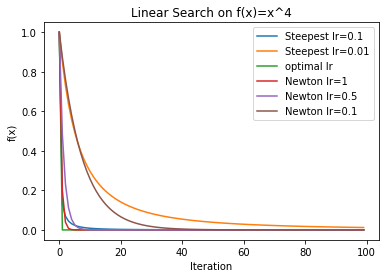

In [16]:
plt.plot(fx_list1[:100])
plt.plot(fx_list2[:100])
plt.plot(fx_list3[:100])
plt.plot(fx_list4[:100])
plt.plot(fx_list5[:100])
plt.plot(fx_list6[:100])
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.title('Linear Search on f(x)=x^4')
plt.legend(['Steepest lr=0.1','Steepest lr=0.01','optimal lr','Newton lr=1','Newton lr=0.5','Newton lr=0.1'])
plt.savefig('Q5')
plt.show()